In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xclim 
import xarray as xr
from pathlib import Path
# import dask 
import os 

In [3]:
from Barcelona import indicators_Barcelona as iB 

In [4]:
import numpy as np 
import xarray as xr

import geopandas as gpd


import rioxarray
import xarray
from shapely.geometry import mapping


In [5]:
outpath = '/mnt/stg/climate/CIL/iberia/indicators/spi3/'

# Catalonia
lat_min, lat_max = 40.3, 42.6
lon_min, lon_max = -1.3, 3.4



In [6]:
import xarray as xr
# dataset = xr.open_zarr('/mnt/stg/climate/CIL/iberia/CIL_historical.zip')
dataset = xr.open_zarr('/mnt/stg/climate/CIL/iberia/CIL_historical')
dataset


<xarray.Dataset> Size: 2GB
Dimensions:  (lat: 36, lon: 52, model: 11, time: 9125)
Coordinates:
  * lat      (lat) float64 288B 35.12 35.38 35.62 35.88 ... 43.38 43.62 43.88
  * lon      (lon) float64 416B -9.375 -9.125 -8.875 ... 2.875 3.125 3.375
  * model    (model) <U20 880B 'ACCESS-CM2' 'BCC-CSM2-MR' ... 'UKESM1-0-LL'
  * time     (time) object 73kB 1990-01-01 12:00:00 ... 2014-12-31 12:00:00
Data variables:
    pr       (model, time, lat, lon) float32 752MB dask.array<chunksize=(1, 100, 36, 52), meta=np.ndarray>
    tasmax   (model, time, lat, lon) float32 752MB dask.array<chunksize=(1, 100, 36, 52), meta=np.ndarray>
    tasmin   (model, time, lat, lon) float32 752MB dask.array<chunksize=(1, 100, 36, 52), meta=np.ndarray>

In [7]:
# select years 1990-2005 
data = dataset.sel(time=slice("1990","2005")).sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

In [9]:
spi3 = iB.spi3(data['pr'],scale=3)


/home/jovyan/T2.4_Carmine/CIL_histo/Barcelona/indicators_Barcelona.py:48: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  stand_prec_index = xr.apply_ufunc(compute_spi,


In [10]:
spi3.to_netcdf(f"{outpath}Spi3_Catalonia_1990_2005.nc")

In [11]:
spi3.mean(dim='time').to_netcdf(f"{outpath}Spi3_Catalonia_1990_2005_mean.nc")

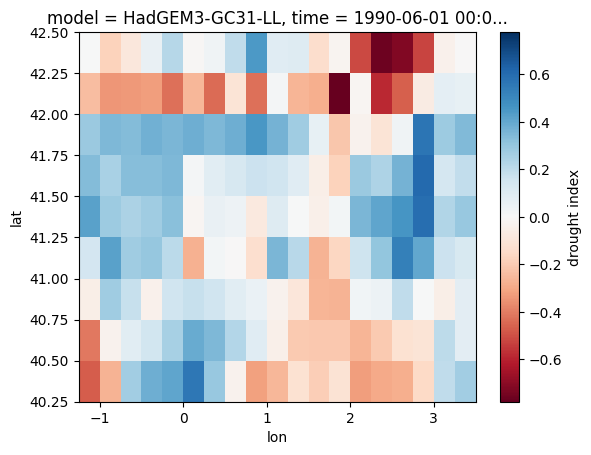

In [14]:
spi3.isel(time=5).isel(model=5).plot(cmap='RdBu')

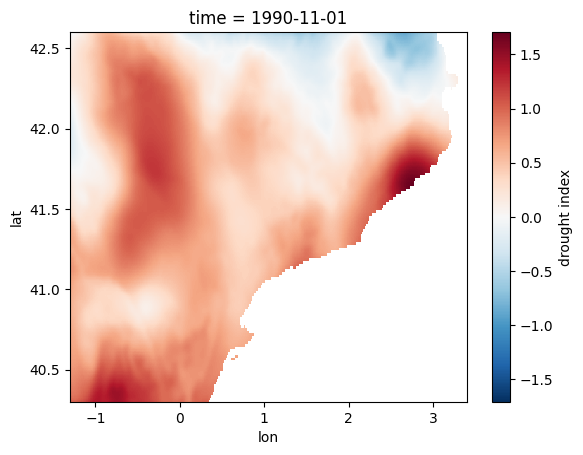

In [42]:
spi3.isel(time=7).plot(cmap='viridis_r')